In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins = penguins[["body_mass_g", "bill_length_mm", "sex", "species"]]
penguins.columns = ["body_mass_g", "bill_length_mm", "gender", "species"]
penguins.dropna(inplace=True)
penguins.reset_index(inplace=True, drop=True)

In [ ]:
penguins_X = penguins[["bill_length_mm", "gender", "species"]]
penguins_y = penguins[["body_mass_g"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    penguins_X, penguins_y, test_size=0.3, random_state=42
)

In [ ]:
# C is categorial variables = text strings
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
ols_data = pd.concat([X_train, y_train], axis=1)

In [ ]:
OLS = ols(formula=ols_formula, data=ols_data)
model = OLS.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           1.31e-92
Time:                        09:02:59   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.Male]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

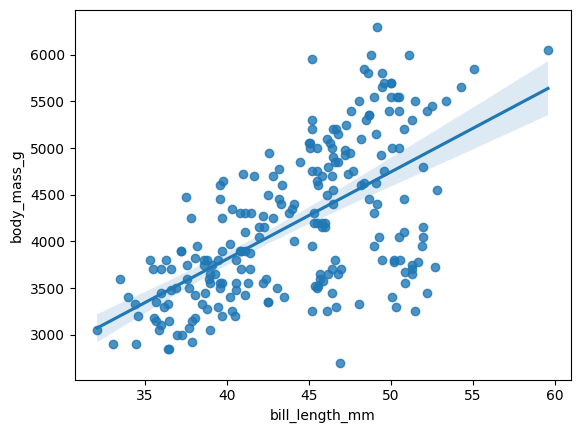

In [ ]:
sns.regplot(x="bill_length_mm", y="body_mass_g", data=ols_data)

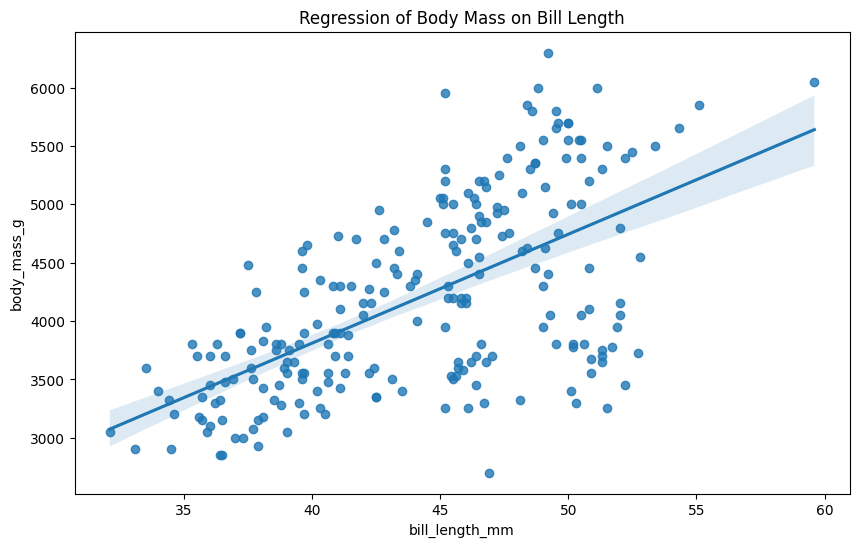

In [ ]:
# 1. Plotting the regression line for bill_length_mm vs body_mass_g
plt.figure(figsize=(10, 6))
sns.regplot(x="bill_length_mm", y="body_mass_g", data=ols_data)
plt.title("Regression of Body Mass on Bill Length")
plt.show()

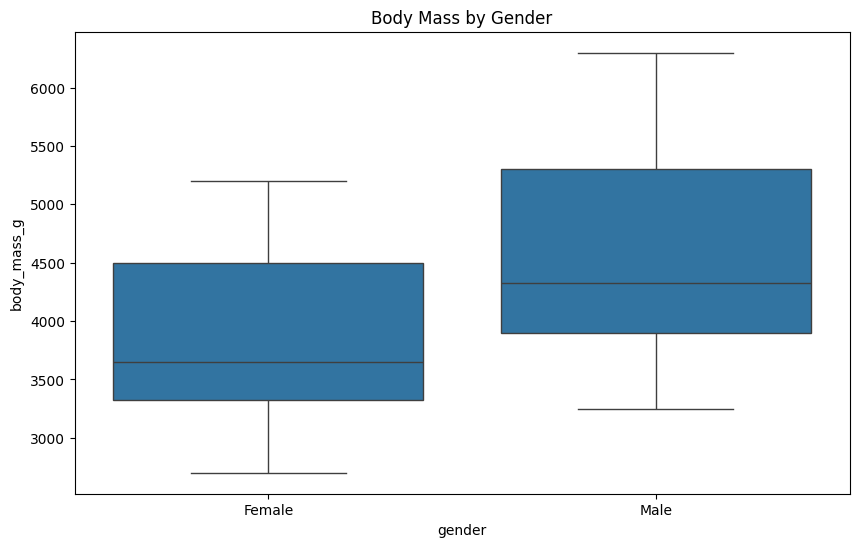

In [ ]:
# 2. Visualizing the effect of gender on body_mass_g
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="body_mass_g", data=ols_data)
plt.title("Body Mass by Gender")
plt.show()

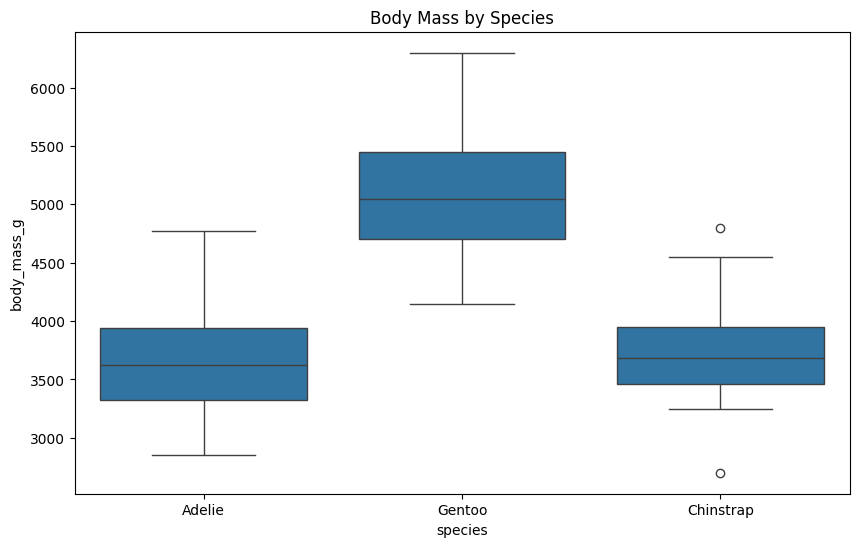

In [ ]:
# 3. Visualizing the effect of species on body_mass_g
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="body_mass_g", data=ols_data)
plt.title("Body Mass by Species")
plt.show()